# Linear Models for Regressions

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_regression
from sklearn.cross_validation import train_test_split

X, y, true_coefficient = make_regression(n_samples=80, n_features=30, n_informative=10, noise=100, coef=True, random_state=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)
print(X_train.shape)
print(y_train.shape)

(60L, 30L)
(60L,)


## Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression().fit(X_train, y_train)
print("R^2 on training set: %f" % linear_regression.score(X_train, y_train))
print("R^2 on test set: %f" % linear_regression.score(X_test, y_test))

R^2 on training set: 0.877842
R^2 on test set: 0.492723


CLEARLY OVERFITTING!

In [5]:
from sklearn.metrics import r2_score
print(r2_score(np.dot(X, true_coefficient), y))

0.729977472078


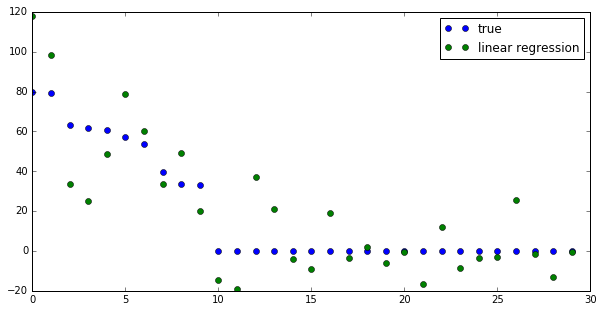

In [8]:
plt.figure(figsize = (10, 5))
coefficient_sorting = np.argsort(true_coefficient)[::-1]
plt.plot(true_coefficient[coefficient_sorting], "o", label="true")
plt.plot(linear_regression.coef_[coefficient_sorting], "o", label="linear regression")

plt.legend()

## Ridge Regression (L2 penalty)

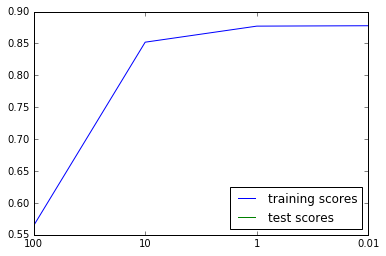

In [12]:
from sklearn.linear_model import Ridge
ridge_models = {}
training_scores = []
test_scores = []

for alpha in [100, 10, 1, 0.01]:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    training_scores.append(ridge.score(X_train, y_train))
    ridge_models[alpha] = ridge
    
plt.plot(training_scores, label="training scores")
plt.plot(test_scores, label = "test scores")
plt.xticks(range(4), [100, 10, 1, 0.01])
plt.legend(loc = "best")

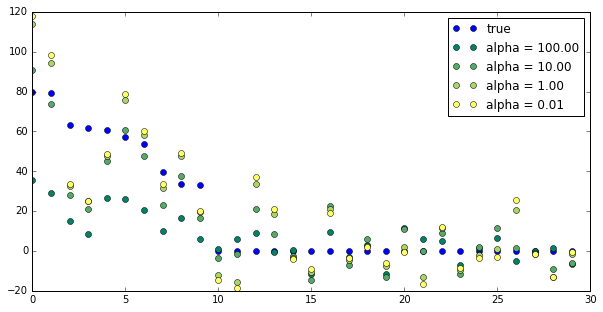

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(true_coefficient[coefficient_sorting], "o", label="true", c='b')

for i, alpha in enumerate([100, 10, 1, 0.01]):
    plt.plot(ridge_models[alpha].coef_[coefficient_sorting], "o", label="alpha = %.2f" % alpha, c=plt.cm.summer(i / 3.))
    
plt.legend(loc="best")

## Lasso (L1 penalty)

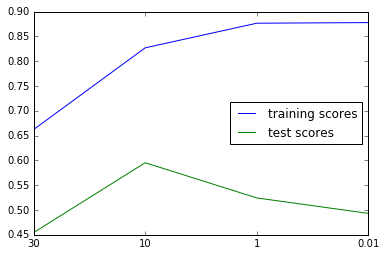

In [14]:
from sklearn.linear_model import Lasso

lasso_models = {}
training_scores = []
test_scores = []

for alpha in [30, 10, 1, .01]:
    lasso = Lasso(alpha=alpha).fit(X_train, y_train)
    training_scores.append(lasso.score(X_train, y_train))
    test_scores.append(lasso.score(X_test, y_test))
    lasso_models[alpha] = lasso

plt.plot(training_scores, label="training scores")
plt.plot(test_scores, label="test scores")
plt.xticks(range(4), [30, 10, 1, .01])
plt.legend(loc="best")

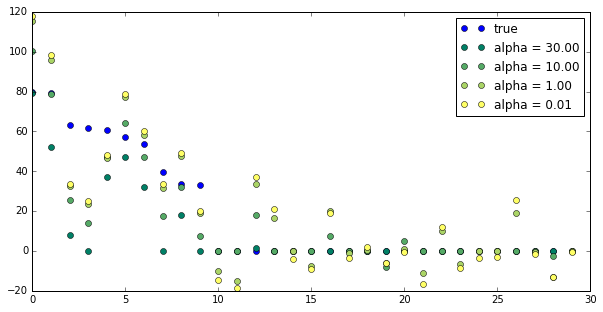

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(true_coefficient[coefficient_sorting], "o", label="true", c='b')

for i, alpha in enumerate([30, 10, 1, .01]):
    plt.plot(lasso_models[alpha].coef_[coefficient_sorting], "o", label="alpha = %.2f" % alpha, c=plt.cm.summer(i / 3.))
    
plt.legend(loc="best")

# Linear Models for Classification

```
y_pred = x_test[0] * coef_[0] + ... + x_test[n_features-1] * coef_[n_features-1] + intercept_ > 0
```

In LinearSVC, influence of C is regularization. Smaller C = Higher Regularization = Focuses on the larger picture = Weights determined by fewer support vectors.

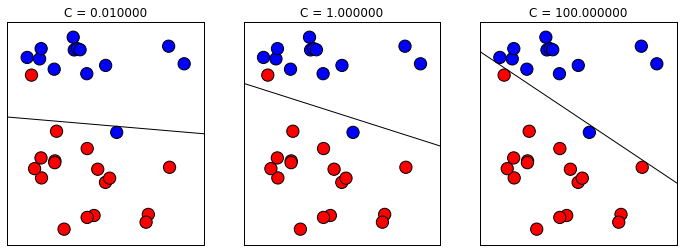

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_blobs


def plot_linear_svc_regularization():
    X, y = make_blobs(centers=2, random_state=4, n_samples=30)
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    # a carefully hand-designed dataset lol
    y[7] = 0
    y[27] = 0
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    for ax, C in zip(axes, [1e-2, 1, 1e2]):
        ax.scatter(X[:, 0], X[:, 1], s=150, c=np.array(['red', 'blue'])[y])

        svm = SVC(kernel='linear', C=C, tol=0.00001).fit(X, y)
        w = svm.coef_[0]
        a = -w[0] / w[1]
        xx = np.linspace(6, 13)
        yy = a * xx - (svm.intercept_[0]) / w[1]
        ax.plot(xx, yy, label="C = %.e" % C, c='k')
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title("C = %f" % C)

if __name__ == "__main__":
    plot_linear_svc_regularization()
    plt.show()

## Multi-Class linear classification

## One vs. the Rest

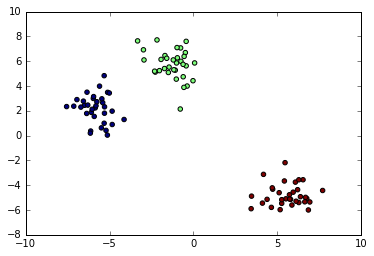

In [17]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 1234)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [19]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)

(3L, 2L)
(3L,)


(-10, 8)

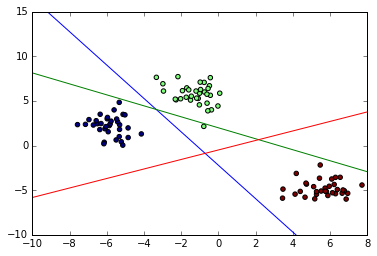

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y)
line = np.linspace(-15, 15)
for coef, intercept in zip(linear_svm.coef_, linear_svm.intercept_):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1])
plt.ylim(-10, 15)
plt.xlim(-10, 8)